In [95]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [96]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()
print(df.head(10))

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)
print(X)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

   cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0     CH   5.0     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   
1     CH  25.0     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   
2     CH  26.0     6    1.0      8.0      8.0     8.0    7.0      6.0     3.0   
3     CH  28.0     6    4.0      6.0      6.0     7.0   10.0      6.0     2.0   
4     CH  29.0     6    5.0      6.0      7.0     5.0    8.0      7.0     2.0   
6     CH  40.0     6    3.0      0.0      5.0     2.0    0.0      2.0     2.0   
7     CH  41.0     6    2.0      4.0      5.0     3.0   10.0      5.0     2.0   
8     CH  51.0     6    2.0      8.0      8.0     8.0    9.0      6.0     4.0   
9     CH  53.0     6    4.0      4.0      4.0     8.0    7.0      4.0     2.0   
10    CH  55.0     6    1.0      6.0      7.0     7.0    9.0      5.0     2.0   

    gndr  agea  partner  
0    2.0  60.0      1.0  
1    2.0  59.0      1.0  
2    1.0  24.0      2.0  
3   

In [97]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


A type I error is a false positive finding, while a type II error is a false negative finding. Looks like we're getting more false negatives here, thus identifying those with a partner as without.  

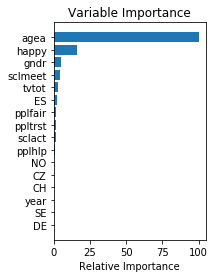

In [98]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

DRILL: Improve this gradient boost model
While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement. Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set. Strategies you might use include:

Creating new features

Applying more overfitting-prevention strategies like subsampling

More iterations

Trying a different loss function

Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications


### Let's check correlated values and use PCA to combine. 

In [99]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X_train, y_train, cv=10)

array([0.7493188 , 0.77520436, 0.70572207, 0.72070845, 0.76944065,
       0.75716235, 0.75443383, 0.74351978, 0.73087432, 0.40846995])

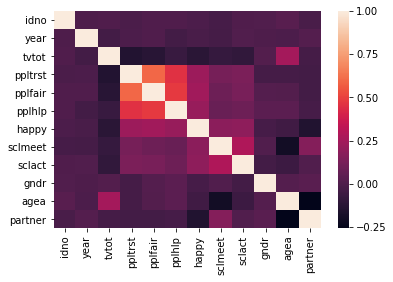

In [100]:
import seaborn as sns
sns.heatmap(df.corr())

In [101]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
X_pca = sklearn_pca.fit_transform(X)

In [102]:
# Create training and test sets.
offset = int(X_pca.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X_pca[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X_pca[offset:], y[offset:]

print(X_train.shape)
print(y_train.shape)

(7332, 9)
(7332,)


In [103]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.037506819421713036
Percent Type II errors: 0.16775777414075285

Test set accuracy:
Percent Type I errors: 0.05889570552147239
Percent Type II errors: 0.2049079754601227


Conclusion: Looks like we actually did slightly worse this go around.

### Let's now try changing the loss function to expontential and see how this affects the outcome 

In [104]:
# We'll make 500 iterations, use -deep trees, and set our loss function to expontential .
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0, 1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0, 0.0] / table_train.loc['All', 'All']

test_tI_errors = table_test.loc[0.0, 1.0]/table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0, 0.0]/table_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.03805237315875614
Percent Type II errors: 0.1718494271685761

Test set accuracy:
Percent Type I errors: 0.05521472392638037
Percent Type II errors: 0.20245398773006135


Conclusion : A bit better on the training set for both, but only slightly better on the test set type I error. 

### Let's now increase the number of iterations 

In [106]:
# We'll make 1000 iterations, use -deep trees, and set our loss function to expontential .
params = {'n_estimators': 1000,
          'max_depth': 2,
          'loss': 'exponential'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0, 1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0, 0.0] / table_train.loc['All', 'All']

test_tI_errors = table_test.loc[0.0, 1.0]/table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0, 0.0]/table_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.03314238952536825
Percent Type II errors: 0.15439170758319695

Test set accuracy:
Percent Type I errors: 0.07116564417177915
Percent Type II errors: 0.19754601226993865


Conclusion: Appears we've gotten worse at type I errors, but better on our type II errors on our test.

### Let's now deepen our decision trees a bit 

In [107]:
# We'll make 1000 iterations, use -deep trees, and set our loss function to expontential .
params = {'n_estimators': 1000,
          'max_depth': 4,
          'loss': 'exponential'}
    
# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0, 1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0, 0.0] / table_train.loc['All', 'All']

test_tI_errors = table_test.loc[0.0, 1.0]/table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0, 0.0]/table_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.0023186033824331696
Percent Type II errors: 0.044053464266230226

Test set accuracy:
Percent Type I errors: 0.08711656441717791
Percent Type II errors: 0.19631901840490798


Conclusion: well we did much better in our training set, but it seems our test set only slightly improved for type II errors and got slightly worse at type I errors. 

### Let's now try subsampling the data

In [108]:
# We'll make 1000 iterations, use -deep trees, and set our loss function to expontential .
params = {'n_estimators': 1000,
          'max_depth': 4,
          'loss': 'exponential',
         'subsample':.5}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0, 1.0] / table_train.loc['All', 'All']
train_tII_errors = table_train.loc[1.0, 0.0] / table_train.loc['All', 'All']

test_tI_errors = table_test.loc[0.0, 1.0]/table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0, 0.0]/table_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.004637206764866339
Percent Type II errors: 0.031096563011456628

Test set accuracy:
Percent Type I errors: 0.09202453987730061
Percent Type II errors: 0.17914110429447852


Conclusion: All of these combined really only increased our training set accuracy, but only very very slightly affected our test set accuracy by increasing the number of type I errors, and very slightly decreasing our type II errors. 